In [1]:
!pip install opencv-python opencv-contrib_python

In [1]:
# 라이브러리 import
import cv2

In [7]:
### 1.1 이미지 로딩 및 출력ㄹ
img = cv2.imread("images/oreo.jpg", # 읽어들일 사진의 경로 및 파일이름
                cv2.IMREAD_GRAYSCALE # 컬러, 흑백 등으로 읽어들일 속성, 상수
                ) # cv2.IMREAD_GRAYSCALE -> 흑백
cv2.imshow("oreo", img)
cv2.waitKey(0) # 키보드  입력이 들어올 때까지 기다리기
cv2.destroyAllWindows()


In [2]:
# matplotlib로 이미지 띄우기
import matplotlib.pyplot as plt

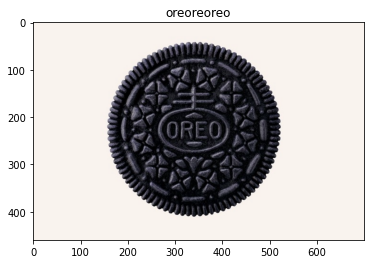

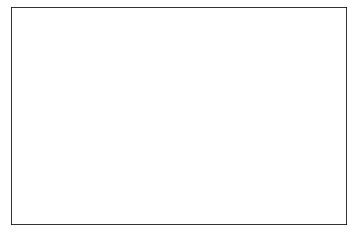

In [11]:
img2 = cv2.imread("images/oreo.jpg",
                 cv2.IMREAD_COLOR)
plt.imshow(img2, cmap='gray')
plt.title("oreoreoreo") # 이미지 이름
plt.show() # 눈금바 안보이게
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
try :
    print("영상로딩을 시작합니다.")
    my_cam = cv2.VideoCapture("images/Sponge.mp4") # 읽어들일 파일경로 or webcam을 연결하고 싶으면 0
except :
    print("카메라 구동 실패")
    my_cam.read() # 영상 프레임 읽기
    
ret, frame = my_cam.read() # 영상 프레임 읽기
                            # ret -> 프레임 읽기 성공 여부
                            # frame -> 읽어들인 frame 데이터
if ret :
    cv2.imshow("video", frame)
    cv2.waitKey(0)
    my_cam.release() # 카메라 메모리 해제
    cv2.destroyAllWindows() # 창 꺼짐

영상로딩을 시작합니다.


In [18]:
try :
    print("영상로딩을 시작합니다.")
    my_cam = cv2.VideoCapture("images/Sponge.mp4") # 읽어들일 파일경로 or webcam을 연결하고 싶으면 0
except :
    print("카메라 구동 실패")
    my_cam.read() # 영상 프레임 읽기
    


while True : 
    ret, frame = my_cam.read() # 영상 프레임 읽기
                            # ret -> 프레임 읽기 성공 여부
                            # frame -> 읽어들인 frame 데이터
    k = cv2.waitKey(30)
    
    if ret :         
        cv2.imshow("video", frame)
    

    if k == 50 : # key가 50이면
        my_cam.release() # 카메라 메모리 해제
        cv2.destroyAllWindows()
        break

영상로딩을 시작합니다.


### 2 Opencv 활용하기
 - 이진(Binary) 이미지 만들기 : 픽셀정보가 0또는 1로 구성된 이미지

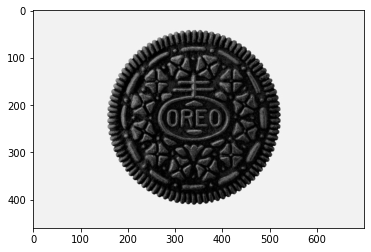

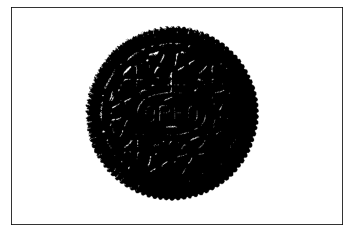

In [4]:
img = cv2.imread("images/oreo.jpg", cv2.IMREAD_GRAYSCALE)

ret, thr1 = cv2.threshold(img, # 변환할 이미지
                          127, # 임계치(0과 1로 나누기 위한 기준값)
                          255, # 기준값보다 클 때 적용할 값
                          cv2.THRESH_BINARY) # 임계치 기준치, 특정 기준치에 속하면 변환해주는 함수

plt.imshow(img, cmap='gray')
plt.show()

plt.imshow(thr1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

### 2.2 픽셀정보 추출 및 변경

In [6]:
img = cv2.imread("images/oreo.jpg")

px = img[50,50]
print(px)

[249 243 238]


In [7]:
px=img[50:52,50:52]
px

array([[[249, 243, 238],
        [249, 243, 238]],

       [[249, 243, 238],
        [249, 243, 238]]], dtype=uint8)

In [9]:
# 픽셀정보 변경
img[50,50] = [0,0,0] # BGR/ BLUE GREEN RED

In [10]:
img[50:101, 50:101] = [0,0,0]

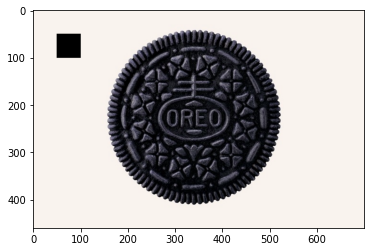

In [11]:
plt.imshow(img)
plt.show()

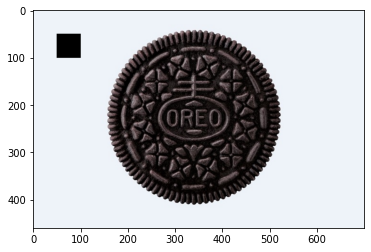

In [12]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

In [13]:
img = cv2.imread("images/oreo.jpg")

roi = img[200:300, 280:400]  #행, 열 
cv2.imshow("roi", roi)
cv2.waitKey(0)  # 키보드 입력 기다리기
cv2.destroyAllWindows()

# 2.4 이미지 속성 출력

In [14]:
print(img.shape)
print(img.size)
print(img.dtype)

(460, 700, 3)
966000
uint8


# 2.5 RGB 채널 분리

In [15]:
img = cv2.imread('images/oreo.jpg')

b = img[:,:,0] # 전체 사진의 파란색 채널만 꺼내온다
g = img[:,:,1] #  그린 색상만 분류
r = img[:,:,2] # 레드 색상만 분류

cv2.imshow('blue', b)
cv2.imshow('green',g)
cv2.imshow('red', r)

cv2.waitKey(0)
cv2.destroyAllWindows() # 합쳐서 3채널로 만들어야 컬러사진으로 만들 수 있다.

### 도형 그리기, Text 그리기
- cv2. rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)
- cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 두께)

In [20]:
img = cv2.imread("images/oreo.jpg")
result_img = cv2.rectangle(img, (200, 300), (280,400),  # 튜플형태
                                 (255,255,255) # 흰색
                                 , 3 )
font = cv2.FONT_HERSHEY_SIMPLEX # 기본폰트
font_img = cv2.putText(result_img, 'Image ROI', (250,285), font, 2, (255, 0,0), 5)                                
cv2.imshow("rectangle", result_img)
cv2.waitKey(0)  # 키보드 입력 기다리기
cv2.destroyAllWindows()                    
                           


## 2.7 외곽선 검출

In [21]:
img = cv2.imread("images/oreo.jpg")
edge = cv2.Canny(img, 50, 200)
cv2.imshow('edge', edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.8 얼굴 검출

In [38]:
cd 딥러닝 # 경로 설정


C:\Users\smhrd\딥러닝


In [1]:
import cv2
face_detector = cv2.CascadeClassifier("images/haarcascade_frontalface_default.xml")
img = cv2.imread("images/face.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출
faces = face_detector.detectMultiScale(gray, 1.3, 5)

for(x,y,w,h) in faces : 
    print((x,y,w,h))
# 검출한 사진에 사각형 그리기
    result_img2 = cv2.rectangle(img, (x,y), (x+w, y+h),  # 튜플형태
                                 (255,255,255) # 흰색
                                 , 3 )
    

cv2.imshow('gray', gray)
cv2.imshow('result_img2', result_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

(206, 33, 69, 69)
(24, 30, 74, 74)
(105, 31, 74, 74)


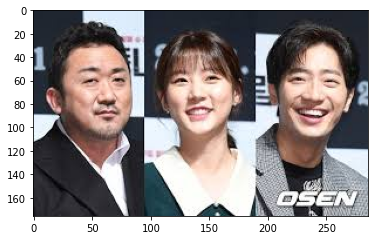

In [44]:
img2 = cv2.imread("images/face.jpg")
rgb_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img2)
plt.show()